## Observations and Insights 

- Propriva was the least tested Drug Regimen in contrast to Capomulin which was the tested on the highets number of mice.

- There was a well proportioned number of male and female mice in the study meaning no potential biase in results based on gender.

- There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_mouse_data = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
# Display the data table for preview
Combined_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
Mice_num = len(Combined_mouse_data['Mouse ID'].unique())
Mice_num

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = [mouseID for mouseID, timepoint in Combined_mouse_data.groupby('Mouse ID')['Timepoint'] 
             if timepoint.value_counts().max() > 1]
dupe_mice


['g989']

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_mice = Combined_mouse_data.loc[Combined_mouse_data['Mouse ID'].isin(dupe_mice)]
Dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for dup in Dup_mice.index:
    if (dup in Combined_mouse_data.index):
        Combined_mouse_data.drop(Dup_mice.index, inplace=True)
        break
Combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(Combined_mouse_data['Mouse ID'].unique())
mice_count

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
unique_regimen = Combined_mouse_data.groupby(['Drug Regimen'])
unique_mean = unique_regimen['Tumor Volume (mm3)'].mean()
unique_median = unique_regimen['Tumor Volume (mm3)'].median()
unique_var = unique_regimen['Tumor Volume (mm3)'].var()
unique_std = unique_regimen['Tumor Volume (mm3)'].std()
unique_sem = unique_regimen['Tumor Volume (mm3)'].sem()
summarystats=pd.DataFrame({'Mean':unique_mean, 'Median':unique_median, 'Variance':unique_var, 'Std Deviation':unique_std, 'SEM':unique_sem})
summarystats


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_group_stats = Combined_mouse_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

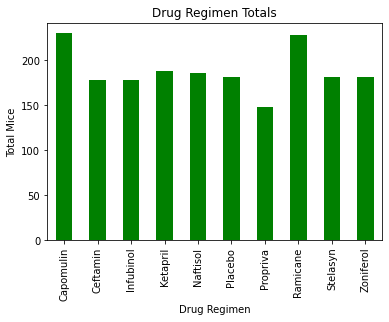

In [34]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#get Value counts and groupby Drugs
drug_group = Combined_mouse_data.groupby('Drug Regimen')
count_drug_regimen = drug_group['Drug Regimen'].count()
count_drug_regimen.sort_values(ascending=False)
#Create Chart
Drug_chart = count_drug_regimen.plot(kind='bar', title= "Drug Regimen Totals", color = 'Green', align = 'center')
Drug_chart.set_xlabel("Drug Regimen")
Drug_chart.set_ylabel("Total Mice");

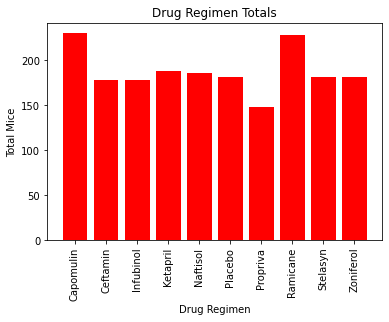

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(count_drug_regimen))
plt.bar(x_axis, count_drug_regimen, color='r',align='center')
plt.title('Drug Regimen Totals')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_drug_regimen.index, rotation = 'vertical');



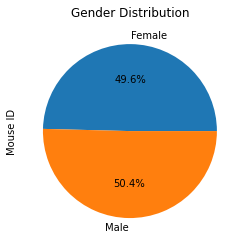

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = Combined_mouse_data.groupby(['Sex'])
unique_count = gender_dist['Mouse ID'].nunique()
unique_count

# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_count.plot(kind='pie', title='Gender Distribution', autopct='%1.1f%%', startangle=0);



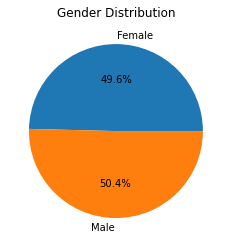

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=(unique_count.index)
plt.pie(unique_count, labels = labels, autopct="%1.1f%%", startangle=0)
plt.title('Gender Distribution');


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# get a subset of the data that is just the Drug Regimen's required
subset_df=Combined_mouse_data[Combined_mouse_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
subset_max_df=subset_df.groupby(['Mouse ID']).agg({'Timepoint':['max']})

#change the odd column name to make the next bit easier
subset_max_df.columns=['Max Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
subset_output_df=pd.merge(subset_max_df, subset_df, how='left',on=['Mouse ID'])

# create a dataframe with the results as at the last timepoint
subset_output_df['diff']=subset_output_df['Max Timepoint'] - subset_output_df['Timepoint']
subset_output_df



,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,diff
0,a203,45,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,45,Infubinol,Female,20,23,5,48.508468,0,40
2,a203,45,Infubinol,Female,20,23,10,51.852437,1,35
3,a203,45,Infubinol,Female,20,23,15,52.777870,1,30
4,a203,45,Infubinol,Female,20,23,20,55.173336,1,25
...,...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2,20
810,z581,45,Infubinol,Female,24,25,30,56.286750,2,15
811,z581,45,Infubinol,Female,24,25,35,58.628399,3,10
812,z581,45,Infubinol,Female,24,25,40,60.053740,3,5


In [49]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
last_timepoint_vol=subset_output_df.loc[(subset_output_df['diff'] == 0) & (subset_output_df['Max Timepoint']> 0)]
last_timepoint_vol
lasttimepoint_vol=last_timepoint_vol[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen','Weight (g)']]

# Put treatments into a list for for loop (and later for plot labels)

treatments = lasttimepoint_vol['Drug Regimen'].unique()
treatments_list=treatments.tolist()
treatments_list

lasttimepoint_vol.sort_values(by=['Drug Regimen','Tumor Volume (mm3)'])

# Create empty list to fill with tumor vol data (for plotting)
plotting_list=[]

# Locate the rows which contain mice on each drug and get the tumor volumes

for drug_regimen in treatments_list:
    drug_regimen_group=lasttimepoint_vol.loc[lasttimepoint_vol['Drug Regimen']==drug_regimen]
    tumor_vol=drug_regimen_group['Tumor Volume (mm3)']
 
    # add subset 
    plotting_list.append(tumor_vol)    

    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=round(upperq-lowerq,2)
    print(f'IQR for {drug_regimen} is {iqr}')
    
    # Determine outliers using upper and lower bounds  
    lower_b=lowerq-(1.5*iqr)
    upper_b=upperq+(1.5*iqr)
    lower_b=(round(lower_b, 2))
    upper_b=(round(upper_b, 2))
    
    drug_regimen_outliers=(tumor_vol.loc[(lasttimepoint_vol['Tumor Volume (mm3)'] >= upper_b) | (lasttimepoint_vol['Tumor Volume (mm3)'] <= lower_b)]).count()
    
    print(f'The number of outliers for {drug_regimen} is {drug_regimen_outliers}') 
    print(f'--------------------------------------- ')



IQR for Infubinol is 11.48
The number of outliers for Infubinol is 1
--------------------------------------- 
IQR for Ceftamin is 8.58
The number of outliers for Ceftamin is 0
--------------------------------------- 
IQR for Ramicane is 9.1
The number of outliers for Ramicane is 0
--------------------------------------- 
IQR for Capomulin is 7.78
The number of outliers for Capomulin is 0
--------------------------------------- 


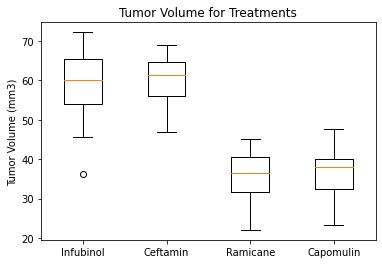

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(plotting_list)
plt.title('Tumor Volume for Treatments')
plt.ylabel('Tumor Volume (mm3)')
ticks=[1,2,3,4]
plt.xticks(ticks, treatments_list);


## Line and Scatter Plots

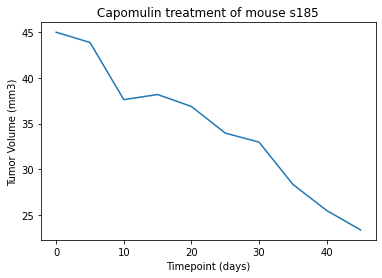

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = Combined_mouse_data.loc[Combined_mouse_data["Drug Regimen"] == "Capomulin",:]

capo_mouse_df = capomulin_df.loc[Combined_mouse_data["Mouse ID"] == "s185",:]

x_axis = capo_mouse_df["Timepoint"]
y_axis = capo_mouse_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse s185")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)");



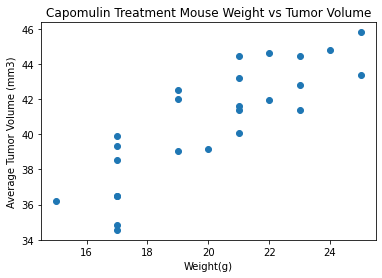

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Capomulin Treatment Mouse Weight vs Tumor Volume");

## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient is {correlation}")

model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

slope = 0.9544396890241045
intercept = 21.552160532685015

model



The correlation coefficient is 0.84


LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

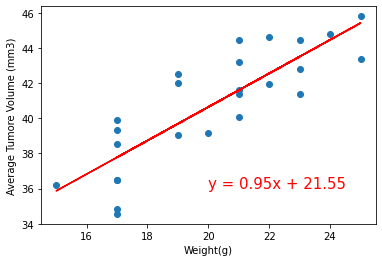

In [62]:
y_axis = cap_avg['Weight (g)']*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_axis,color="red")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)');